<a href="https://colab.research.google.com/github/jinjin0309/DATATHON_6/blob/main/%ED%8F%89%EC%9D%BC_%EB%82%A0%EC%94%A8_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1️⃣ 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null

# 2️⃣ 런타임 재시작 필요 없이 바로 적용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 폰트 경로 수동 등록
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')  # 폰트 적용
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# ✅ 현재 설정된 폰트 확인
print("✅ 현재 설정된 폰트:", plt.rcParams['font.family'])


✅ 현재 설정된 폰트: ['NanumGothic']


In [ ]:
!apt-get update -qq
!apt-get install -y fonts-nanum


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 44 not upgraded.


In [ ]:
count_weekday = df['내용'].str.contains('평일', na=False).sum()
print(f"'평일' 키워드가 포함된 리뷰 개수: {count_weekday}")


'평일' 키워드가 포함된 리뷰 개수: 459


In [ ]:
total_reviews = len(df)
ratio_weekday = count_weekday / total_reviews * 100
print(f"'평일' 언급 리뷰 비율: {ratio_weekday:.2f}% ({count_weekday} / {total_reviews})")


'평일' 언급 리뷰 비율: 7.13% (459 / 6434)


In [ ]:
# '평일'이 포함된 리뷰만 필터링
weekday_df = df[df['내용'].str.contains('평일', na=False)]

# 전체 개수
total_weekday = len(weekday_df)

# 라벨별 개수와 비율 계산
label_counts = weekday_df['라벨'].value_counts()
label_ratio = weekday_df['라벨'].value_counts(normalize=True) * 100

print(f"📊 '평일' 언급 리뷰 총 개수: {total_weekday}")
print("\n라벨별 개수:")
print(label_counts)
print("\n라벨별 비율(%):")
print(label_ratio.round(2))


📊 '평일' 언급 리뷰 총 개수: 459

라벨별 개수:
라벨
1    262
0    197
Name: count, dtype: int64

라벨별 비율(%):
라벨
1    57.08
0    42.92
Name: proportion, dtype: float64


    긍정(1)  부정(0)
평일    262    197
날씨    215     85


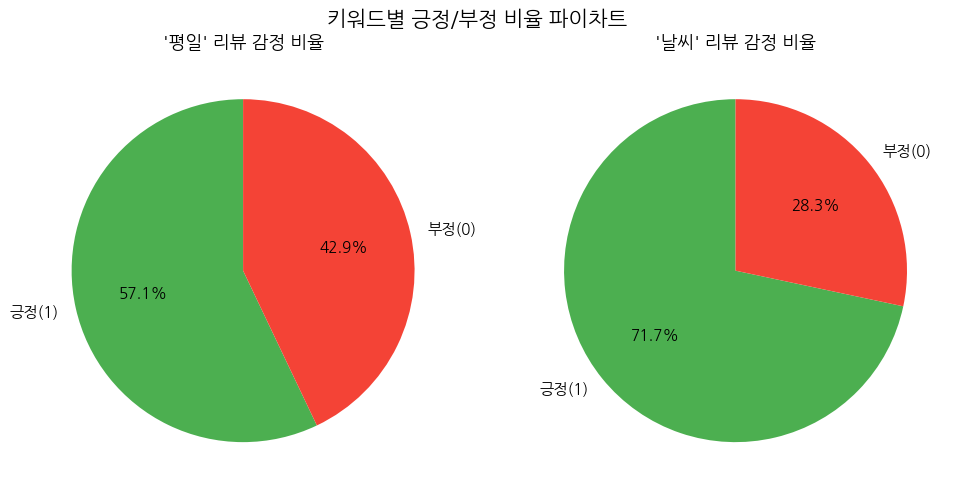

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ 데이터 불러오기
df = pd.read_csv('/content/naver+google_review_final.csv')
df = df.dropna(subset=['내용', '라벨'])
df['내용'] = df['내용'].astype(str)

# 2️⃣ 분석할 키워드 목록
keywords = ['평일', '날씨']

# 3️⃣ 키워드별 긍정/부정 카운트 계산
results = {}
for kw in keywords:
    subset = df[df['내용'].str.contains(kw, na=False)]
    counts = subset['라벨'].value_counts()
    results[kw] = {
        '긍정(1)': counts.get(1, 0),
        '부정(0)': counts.get(0, 0)
    }

# 4️⃣ 결과 DataFrame
result_df = pd.DataFrame(results).T
print(result_df)

# 5️⃣ 파이차트 시각화
fig, axes = plt.subplots(1, len(result_df), figsize=(10, 5))
if len(result_df) == 1:
    axes = [axes]  # 단일 그래프일 경우 리스트 처리

for ax, (kw, row) in zip(axes, result_df.iterrows()):
    ax.pie(
        row,
        labels=row.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#4CAF50', '#F44336'],  # 초록(긍정), 빨강(부정)
        textprops={'fontsize': 11}
    )
    ax.set_title(f"'{kw}' 리뷰 감정 비율", fontsize=13)

plt.suptitle('키워드별 긍정/부정 비율 파이차트', fontsize=15)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# 1️⃣ 데이터 불러오기
df = pd.read_csv('/content/naver+google_review_final.csv')
df = df.dropna(subset=['내용', '라벨'])
df['내용'] = df['내용'].astype(str)

# 2️⃣ 평일 언급 리뷰 필터링
weekday_df = df[df['내용'].str.contains('평일', na=False)]
pos_texts = weekday_df[weekday_df['라벨'] == 1]['내용']
neg_texts = weekday_df[weekday_df['라벨'] == 0]['내용']

print(f"📊 '평일' 언급 리뷰 총 개수: {len(weekday_df)}")
print(f"👍 긍정 리뷰 개수: {len(pos_texts)}")
print(f"👎 부정 리뷰 개수: {len(neg_texts)}")

# 3️⃣ 불용어 리스트 (일반 + 의미적)
semantic_stopwords = [

    '것', '수', '들', '그', '이', '저', '및', '더', '등', '거', '제', '좀',
    '에서', '하다', '입니다', '으로', '하는', '에도', '하게', '하고', '하고싶다',
    '너무', '매우', '정말', '진짜', '때문', '위해', '하지만', '거나', '보다', '해서',
    '에서는', '으로서', '으로써', '하면서', '이면', '였다', '였다가', '이나', '에는', '곳', '분', '때', '탈', '서기', '년', '개', '시', '비', '하나', '날',
    '그냥', '정도', '안', '느낌', '거의', '이상', '타고', '한번', '말', '보고', '만', '듯', '별로', '도', '뭐', '원', '션', '함', '스', '밸리', '전', '다시', '어',
    '일', '프레', '가지', '왜', '해', '못', '애', '기분', '볼', '번', '이제', '역시', '가면', '만원', '임', '문', '자유', '장소', '지금', '한국',
    '할인', '내', '몇개', '조금', '월','꼭', '바로', '제대로', '기도', '레', '찬스', '게', '가세', '후', '앞', '요', '점', '다음', '또', '이후',
    '온', '뭔가', '곳도', '점점', '중', '동안', '대한', '계속', '자주', '또한', '음', '이번', '티', '완전','모든', '요즘', '전체', '나라', '년전',
    '베이', '항상', '땐', '외', '무슨', '인지', '안해', '초', '쪽', '토피아', '가기', '우리', '제로', '늘', '데리',
    '이다', '오다', '없다', '과', '같다', '놀다', '다', '자다', '한', '와', '고', '까지', '있다', '없다', '오다', '한', '이다', '다', '같다',
    '고', '과', '아니다', '서', '그리고', '이라', '나', '인데', '에', '가', '을', '는', '은', '가다', '의', '를', '로', '되다', '않다', '대', '타다',
    '적', '그래도', '되어다', '넘다', '많이', '생각', '기본', '먹다', '기', '그렇다', '들어가다', '서다', '그래도' ,
    '부터', '예전', '받다', '싶다', '인', '만에',
    '안되다', '두', '비다', '다녀오다', '엔', '같다', '하', '내다', '니', '나오다', '들다', '많다', '적다', '좋아요', '놀이기구', '많아서', '많고', '많음',
    '있어서', '있는', '있습니다', '있어요', '좋았습니다', '좋습니다', '같아요', '많아요', '좋은', '즐거운', '가서', '있어', '많으니', '생각보다', '재밌고', '좋네요',
    '갑니다', '왔어요', '재미있게', '추천합니다', '좋겠어요', '이미', '때문에', '차라리', '않고', '가세요', '아니면', '것도', '있고', '그런지', '이미', '같아요', '타려면',
    '엄청', '오랜만에', '그런데', '생각보다', '곳이', '비해', '가서', '근데', '것이', '절대', '갔는데', '있음', '곳이', '이젠', '생각이', '했는데', '이렇게', '최고', '행복',
    '완벽', '추천', '방문', '감사','준비','에버랜드', '성공', '힐링', '우리나라', '즐거움', '내외', '필수',
    '아들', '고민', '휴가', '만족', '사랑', '전반', '이유', '추가', '일반', '장사', '최악', '실망', '불편', '기쁨', '하루', '한창', '이해','유명', '세계', '사람', '시간', '아쉬움'
'에', '에도', '인데도', '에버랜드', '평일','평일은','평일에도','평일이라','평일인데','평일에', '평일인데도', '에버랜드는', '접기'
]


# 4️⃣ CountVectorizer 설정
vectorizer = CountVectorizer(
    token_pattern=r'(?u)\b[가-힣]{2,}\b',
    stop_words=semantic_stopwords
)

# 5️⃣ 단어 빈도 계산
pos_matrix = vectorizer.fit_transform(pos_texts)
pos_freq = dict(zip(vectorizer.get_feature_names_out(), pos_matrix.sum(axis=0).A1))

neg_matrix = vectorizer.fit_transform(neg_texts)
neg_freq = dict(zip(vectorizer.get_feature_names_out(), neg_matrix.sum(axis=0).A1))

# 6️⃣ 상위 20개 키워드 출력
pos_top20 = Counter(pos_freq).most_common(20)
neg_top20 = Counter(neg_freq).most_common(20)

pos_df = pd.DataFrame(pos_top20, columns=['단어', '빈도'])
neg_df = pd.DataFrame(neg_top20, columns=['단어', '빈도'])

print("\n👍 평일 리뷰 중 긍정 Top 20 단어\n", pos_df.to_string(index=False))
print("\n👎 평일 리뷰 중 부정 Top 20 단어\n", neg_df.to_string(index=False))

# 7️⃣ (선택) 테마별 분류 예시
themes = {
    '운영관련': ['운영','닫혀','없어서','시간제한','입장','휴무'],
    '혼잡도관련': ['대기','줄','기다림','사람','붐빔','한산','여유'],
    '시설관련': ['청결','화장실','편의','시설','관리','상태'],
    '날씨관련': ['비','더워','추워','날씨','햇빛','덥다'],
}

def theme_analysis(freq_dict, theme_words):
    results = {}
    for theme, keywords in theme_words.items():
        results[theme] = sum(freq_dict.get(k, 0) for k in keywords)
    return pd.DataFrame(results.items(), columns=['테마','빈도']).sort_values('빈도', ascending=False)

print("\n✅ 평일 긍정 리뷰 테마별 분석")
print(theme_analysis(pos_freq, themes))

print("\n✅ 평일 부정 리뷰 테마별 분석")
print(theme_analysis(neg_freq, themes))


📊 '평일' 언급 리뷰 총 개수: 459
👍 긍정 리뷰 개수: 262
👎 부정 리뷰 개수: 197

👍 평일 리뷰 중 긍정 Top 20 단어
    단어  빈도
  사람이  50
   많은  19
   대기  16
  사람도  15
 좋았어요  15
  사파리  14
   없이  13
놀이기구를  12
  많네요  12
  탔어요  11
 사람들이  10
  아마존  10
  없어서  10
   제일  10
놀이기구는   9
 퍼레이드   9
   가도   8
   많지   8
  스마트   8
   오후   8

👎 평일 리뷰 중 부정 Top 20 단어
    단어  빈도
  사람이  60
  사파리  16
놀이기구는  12
  스마트  12
 좋았어요  11
   대기  10
  줄서기  10
  없어서   9
놀이기구도   8
  많네요   8
 인기있는   8
   정문   8
 놀이공원   7
  대기가   7
   많아   7
   많은   7
  시간이   7
   오후   7
   인기   7
  코로나   7

✅ 평일 긍정 리뷰 테마별 분석
      테마  빈도
1  혼잡도관련  20
0   운영관련  15
2   시설관련   3
3   날씨관련   2

✅ 평일 부정 리뷰 테마별 분석
      테마  빈도
0   운영관련  12
1  혼잡도관련  11
3   날씨관련   5
2   시설관련   1


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# 1️⃣ 데이터 불러오기
df = pd.read_csv('/content/naver+google_review_final.csv')
df = df.dropna(subset=['내용', '라벨'])
df['내용'] = df['내용'].astype(str)

# 2️⃣ '날씨' 언급 리뷰 필터링
weather_df = df[df['내용'].str.contains('날씨', na=False)]
pos_texts = weather_df[weather_df['라벨'] == 1]['내용']
neg_texts = weather_df[weather_df['라벨'] == 0]['내용']

print(f"📊 '날씨' 언급 리뷰 총 개수: {len(weather_df)}")
print(f"👍 긍정 리뷰 개수: {len(pos_texts)}")
print(f"👎 부정 리뷰 개수: {len(neg_texts)}")

# 3️⃣ 불용어 리스트 (이전과 동일)
semantic_stopwords = [


    '것', '수', '들', '그', '이', '저', '및', '더', '등', '거', '제', '좀',
    '에서', '하다', '입니다', '으로', '하는', '에도', '하게', '하고', '하고싶다',
    '너무', '매우', '정말', '진짜', '때문', '위해', '하지만', '거나', '보다', '해서',
    '에서는', '으로서', '으로써', '하면서', '이면', '였다', '였다가', '이나', '에는', '곳', '분', '때', '탈', '서기', '년', '개', '시', '비', '하나', '날',
    '그냥', '정도', '안', '느낌', '거의', '이상', '타고', '한번', '말', '보고', '만', '듯', '별로', '도', '뭐', '원', '션', '함', '스', '밸리', '전', '다시', '어',
    '일', '프레', '가지', '왜', '해', '못', '애', '기분', '볼', '번', '이제', '역시', '가면', '만원', '임', '문', '자유', '장소', '지금', '한국',
    '할인', '내', '몇개', '조금', '월','꼭', '바로', '제대로', '기도', '레', '찬스', '게', '가세', '후', '앞', '요', '점', '다음', '또', '이후',
    '온', '뭔가', '곳도', '점점', '중', '동안', '대한', '계속', '자주', '또한', '음', '이번', '티', '완전','모든', '요즘', '전체', '나라', '년전',
    '베이', '항상', '땐', '외', '무슨', '인지', '안해', '초', '쪽', '토피아', '가기', '우리', '제로', '늘', '데리',
    '이다', '오다', '없다', '과', '같다', '놀다', '다', '자다', '한', '와', '고', '까지', '있다', '없다', '오다', '한', '이다', '다', '같다',
    '고', '과', '아니다', '서', '그리고', '이라', '나', '인데', '에', '가', '을', '는', '은', '가다', '의', '를', '로', '되다', '않다', '대', '타다',
    '적', '그래도', '되어다', '넘다', '많이', '생각', '기본', '먹다', '기', '그렇다', '들어가다', '서다', '그래도' ,
    '부터', '예전', '받다', '싶다', '인', '만에',
    '안되다', '두', '비다', '다녀오다', '엔', '같다', '하', '내다', '니', '나오다', '들다', '많다', '적다', '좋아요', '놀이기구', '많아서', '많고', '많음',
    '있어서', '있는', '있습니다', '있어요', '좋았습니다', '좋습니다', '같아요', '많아요', '좋은', '즐거운', '가서', '있어', '많으니', '생각보다', '재밌고', '좋네요',
    '갑니다', '왔어요', '재미있게', '추천합니다', '좋겠어요', '이미', '때문에', '차라리', '않고', '가세요', '아니면', '것도', '있고', '그런지', '이미', '같아요', '타려면',
    '엄청', '오랜만에', '그런데', '생각보다', '곳이', '비해', '가서', '근데', '것이', '절대', '갔는데', '있음', '곳이', '이젠', '생각이', '했는데', '이렇게', '최고', '행복',
    '완벽', '추천', '방문', '감사','준비','에버랜드', '성공', '힐링', '우리나라', '즐거움', '내외', '필수',
    '아들', '고민', '휴가', '만족', '사랑', '전반', '이유', '추가', '일반', '장사', '최악', '실망', '불편', '기쁨', '하루', '한창', '이해','유명', '세계', '사람', '시간', '아쉬움'
'에', '에도', '인데도', '에버랜드', '날씨가', '날씨에', '날씨도', '날씨', '접기']

# 4️⃣ CountVectorizer 설정
vectorizer = CountVectorizer(
    token_pattern=r'(?u)\b[가-힣]{2,}\b',
    stop_words=semantic_stopwords
)

# 5️⃣ 단어 빈도 계산
pos_matrix = vectorizer.fit_transform(pos_texts)
pos_freq = dict(zip(vectorizer.get_feature_names_out(), pos_matrix.sum(axis=0).A1))

neg_matrix = vectorizer.fit_transform(neg_texts)
neg_freq = dict(zip(vectorizer.get_feature_names_out(), neg_matrix.sum(axis=0).A1))

# 6️⃣ 상위 20개 키워드 출력
pos_top20 = Counter(pos_freq).most_common(20)
neg_top20 = Counter(neg_freq).most_common(20)

pos_df = pd.DataFrame(pos_top20, columns=['단어', '빈도'])
neg_df = pd.DataFrame(neg_top20, columns=['단어', '빈도'])

print("\n👍 날씨 리뷰 중 긍정 Top 20 단어\n", pos_df.to_string(index=False))
print("\n👎 날씨 리뷰 중 부정 Top 20 단어\n", neg_df.to_string(index=False))

# 7️⃣ 테마별 분류 예시
themes = {
    '운영관련': ['운영','닫혀','없어서','시간제한','입장','휴무'],
    '혼잡도관련': ['대기','줄','기다림','사람','붐빔','한산','여유'],
    '시설관련': ['청결','화장실','편의','시설','관리','상태'],
    '날씨관련': ['비','더워','추워','날씨','햇빛','덥다','기온','온도'],
}

def theme_analysis(freq_dict, theme_words):
    results = {}
    for theme, keywords in theme_words.items():
        results[theme] = sum(freq_dict.get(k, 0) for k in keywords)
    return pd.DataFrame(results.items(), columns=['테마','빈도']).sort_values('빈도', ascending=False)

print("\n✅ 날씨 긍정 리뷰 테마별 분석")
print(theme_analysis(pos_freq, themes))

print("\n✅ 날씨 부정 리뷰 테마별 분석")
print(theme_analysis(neg_freq, themes))


📊 '날씨' 언급 리뷰 총 개수: 300
👍 긍정 리뷰 개수: 215
👎 부정 리뷰 개수: 85

👍 날씨 리뷰 중 긍정 Top 20 단어
    단어  빈도
   좋고  40
  사람이  35
  사람도  21
 좋았어요  21
  좋아서  16
 왔습니다  12
   많은  10
  사파리  10
에버랜드는  10
   함께  10
놀이기구는   9
 사람들이   9
  즐겁게   9
  날씨는   8
   놀기   8
놀이기구도   8
 퍼레이드   8
놀이기구를   7
   대기   7
 많았지만   7

👎 날씨 리뷰 중 부정 Top 20 단어
    단어  빈도
  사람이  23
놀이기구를   9
   많은   7
  사파리   7
 좋았어요   7
   같은   6
   좋고   6
   더운   5
   아주   5
  없어서   5
 퍼레이드   5
놀이기구가   4
   다만   4
   대기   4
  더워서   4
로스트밸리   4
   비가   4
  아니고   4
   이용   4
  있었고   4

✅ 날씨 긍정 리뷰 테마별 분석
      테마  빈도
0   운영관련  10
1  혼잡도관련   9
3   날씨관련   2
2   시설관련   1

✅ 날씨 부정 리뷰 테마별 분석
      테마  빈도
0   운영관련   8
1  혼잡도관련   5
3   날씨관련   1
2   시설관련   0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import re

# 1️⃣ 데이터 불러오기
df = pd.read_csv('/content/naver+google_review_final.csv')
df = df.dropna(subset=['내용', '라벨'])
df['내용'] = df['내용'].astype(str)


# 2️⃣ 감정어 통합 (좋았어요 → 좋음 등)
synonym_dict = {
    '좋음': ['좋아요','좋았어요','좋았다','좋고','좋네요','좋은','좋아서','좋았습니다','좋습니다','좋았고','좋았던','좋았네요','좋았지만','좋네','좋았음'],
    '재밌음': ['재밌어요','재밌다','재미있어요','재밌었어요','재미있다','재밌고','재밌었고','재미있네요'],
    '즐거움': ['즐거워요','즐거웠어요','즐겁다','즐겁게','즐거웠습니다'],
    '불편함': ['불편해요','불편하다','불편했어요','불편했습니다','불편했네요','불편함'],
    '아쉬움': ['아쉬워요','아쉬웠어요','아쉽네요','아쉬움','아쉬웠습니다','아쉬웠지만'],
    '더움': ['더워요','더웠어요','더워서','덥고','덥네요','더운','너무더워서'],
    '추움': ['추워요','추웠어요','추워서','춥고','춥네요','춥다','춥습니다'],
    '비옴': ['비와서','비오고','비왔어요','비가와서','비왔는데','비옴','비가','비오는'],
    '없음': ['없어요','없어서','없었어요','없었습니다','없네요','없지만','없었네요'],
    '닫힘': ['닫혀있어요','닫혔어요','닫혀있네요','운영안함','운영하지','쉬고','휴무']
}

def normalize_text(text):
    for base, variants in synonym_dict.items():
        pattern = r'(' + '|'.join(map(re.escape, variants)) + r')'
        text = re.sub(pattern, base, text)
    return text

df['내용'] = df['내용'].apply(lambda x: normalize_text(str(x)))


# 3️⃣ 조사 제거 + 복수형 통합 (사람이→사람, 놀이기구를→놀이기구)
def lemmatize_korean(text):
    text = re.sub(r'([가-힣]+)(이|가|은|는|도|을|를|에|에서|으로|로|과|와|들|까지|에게|보다|부터|조차|처럼|으로써|에선|으로는|이랑|라도|만큼|하며)$', r'\1', text)
    return text

df['내용'] = df['내용'].apply(lemmatize_korean)

# 4️⃣ 불용어 (조사 포함 확장)
semantic_stopwords = [
    '것','수','들','그','이','저','및','더','등','거','제','좀','에서','하다','으로','하는','에도','하게','하고','너무','매우','정말',
    '진짜','때문','위해','하지만','거나','보다','해서','에서는','으로서','으로써','하면서','이면','였다','이나','에는','곳','분','때','서기',
    '년','개','시','비','하나','그냥','정도','안','느낌','거의','이상','타고','한번','말','보고','만','듯','별로','도','뭐','원','전','다시',
    '일','가지','왜','못','번','이제','역시','가면','만원','임','문','자유','장소','지금','한국','내','몇개','조금','월','꼭','바로','제대로',
    '후','앞','요','점','다음','또','동안','대한','계속','자주','음','이번','완전','모든','요즘','전체','나라','예전','무슨','인지','안해','초',
    '쪽','가기','우리','늘','이다','오다','없다','과','같다','놀다','자다','한','와','고','까지','있다','서','그리고','이라','나','인데','에',
    '가','을','는','은','의','를','로','되다','않다','대','타다','그래도','넘다','많이','생각','기본','기','그렇다','들어가다','서다','부터',
    '받다','싶다','인','안되다','두','비다','엔','같다','하','내다','니','나오다','들다','많다','적다','좋아요','놀이기구','많아서','많고',
    '있어서','있는','있습니다','있어요','좋았습니다','좋습니다','같아요','많아요','좋은','즐거운','가서','있어','많으니','재밌고','좋네요',
    '왔어요','추천합니다','좋겠어요','때문에','않고','가세요','것도','있고','그런지','같아요','타려면','엄청','오랜만에','그런데','생각보다',
    '곳이','비해','가서','근데','것이','절대','갔는데','있음','이젠','했는데','이렇게','최고','행복','추천','방문','감사','에버랜드','평일','날씨','접기'
, '접기', '날씨가', '날씨도', '다만' ]

# 5️⃣ CountVectorizer로 분석
def keyword_analysis(keyword):
    subset = df[df['내용'].str.contains(keyword, na=False)]
    pos_texts = subset[subset['라벨'] == 1]['내용']
    neg_texts = subset[subset['라벨'] == 0]['내용']

    print(f"\n📊 '{keyword}' 언급 리뷰 총 개수: {len(subset)}")
    print(f"👍 긍정 리뷰 개수: {len(pos_texts)}")
    print(f"👎 부정 리뷰 개수: {len(neg_texts)}")

    vectorizer = CountVectorizer(token_pattern=r'(?u)\b[가-힣]{2,}\b', stop_words=semantic_stopwords)

    pos_matrix = vectorizer.fit_transform(pos_texts)
    pos_freq = dict(zip(vectorizer.get_feature_names_out(), pos_matrix.sum(axis=0).A1))

    neg_matrix = vectorizer.fit_transform(neg_texts)
    neg_freq = dict(zip(vectorizer.get_feature_names_out(), neg_matrix.sum(axis=0).A1))

    pos_df = pd.DataFrame(Counter(pos_freq).most_common(20), columns=['단어','빈도'])
    neg_df = pd.DataFrame(Counter(neg_freq).most_common(20), columns=['단어','빈도'])

    print(f"\n👍 {keyword} 리뷰 중 긍정 Top 20 단어\n", pos_df.to_string(index=False))
    print(f"\n👎 {keyword} 리뷰 중 부정 Top 20 단어\n", neg_df.to_string(index=False))

# 실행
for kw in ['평일', '날씨']:
    keyword_analysis(kw)



📊 '평일' 언급 리뷰 총 개수: 459
👍 긍정 리뷰 개수: 262
👎 부정 리뷰 개수: 197

👍 평일 리뷰 중 긍정 Top 20 단어
    단어  빈도
   좋음 101
  평일에  82
  사람이  50
   사람  25
   없음  21
에버랜드는  21
 평일이라  21
   많은  19
   대기  16
  사람도  15
  사파리  14
 평일에도  14
   없이  13
평일인데도  13
놀이기구를  12
  많네요  12
  탔어요  11
 사람들이  10
  아마존  10
   제일  10

👎 평일 리뷰 중 부정 Top 20 단어
    단어  빈도
  사람이  60
  평일에  44
   사람  39
   좋음  38
평일인데도  28
 평일에도  22
   없음  19
  사파리  16
놀이기구는  12
  스마트  12
 평일이라  12
   대기  10
  줄서기  10
   시간   9
놀이기구도   8
  많네요   8
 인기있는   8
   정문   8
 놀이공원   7
  대기가   7

📊 '날씨' 언급 리뷰 총 개수: 300
👍 긍정 리뷰 개수: 215
👎 부정 리뷰 개수: 85

👍 날씨 리뷰 중 긍정 Top 20 단어
    단어  빈도
   좋음 157
  사람이  35
  사람도  21
  즐거움  15
   비옴  12
 왔습니다  12
   많은  10
  사파리  10
   없음  10
에버랜드는  10
   함께  10
  날씨에   9
놀이기구는   9
 사람들이   9
  재밌음   9
  날씨는   8
   놀기   8
놀이기구도   8
   시간   8
   추움   8

👎 날씨 리뷰 중 부정 Top 20 단어
    단어  빈도
   좋음  45
  사람이  23
   더움  12
  날씨에   9
놀이기구를   9
   없음   9
   많은   7
  사파리   7
   같은   6
   비옴   6
  아쉬움   5
   아주   5
 퍼레이드   5
놀이기구가   4
   대기   4

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import re

# 1️⃣ 데이터 불러오기
df = pd.read_csv('/content/naver+google_review_final.csv')
df = df.dropna(subset=['내용', '라벨'])
df['내용'] = df['내용'].astype(str)

# 2️⃣ 감정어 통합 (좋았어요 → 좋음 등)
synonym_dict = {
    '좋음': ['좋아요','좋았어요','좋았다','좋고','좋네요','좋은','좋아서','좋았습니다','좋습니다','좋았고','좋았던','좋았네요','좋았지만','좋네','좋았음'],
    '재밌음': ['재밌어요','재밌다','재미있어요','재밌었어요','재미있다','재밌고','재밌었고','재미있네요'],
    '즐거움': ['즐거워요','즐거웠어요','즐겁다','즐겁게','즐거웠습니다'],
    '불편함': ['불편해요','불편하다','불편했어요','불편했습니다','불편했네요','불편함'],
    '아쉬움': ['아쉬워요','아쉬웠어요','아쉽네요','아쉬움','아쉬웠습니다','아쉬웠지만'],
    '더움': ['더워요','더웠어요','더워서','덥고','덥네요','더운','너무더워서'],
    '추움': ['추워요','추웠어요','추워서','춥고','춥네요','춥다','춥습니다'],
    '비옴': ['비와서','비오고','비왔어요','비가와서','비왔는데','비옴','비가','비오는'],
    '없음': ['없어요','없어서','없었어요','없었습니다','없네요','없지만','없었네요'],
    '닫힘': ['닫혀있어요','닫혔어요','닫혀있네요','운영안함','운영하지','쉬고','휴무']
}
def normalize_text(text):
    for base, variants in synonym_dict.items():
        pattern = r'(' + '|'.join(map(re.escape, variants)) + r')'
        text = re.sub(pattern, base, text)
    return text
df['내용'] = df['내용'].apply(lambda x: normalize_text(str(x)))

# 3️⃣ 표제어 통합
lemma_dict = {
    '놀이기구': ['놀이기구가','놀이기구는','놀이기구도','놀이기구를','놀이기구에'],
    '사람': ['사람이','사람은','사람도','사람들','사람들이','사람은요'],
    '사파리': ['사파리는','사파리도','사파리에서','사파리를'],
    '퍼레이드': ['퍼레이드는','퍼레이드도','퍼레이드를','퍼레이드가']
}
def unify_lemmas(text):
    for base, variants in lemma_dict.items():
        pattern = r'(' + '|'.join(map(re.escape, variants)) + r')'
        text = re.sub(pattern, base, text)
    return text
df['내용'] = df['내용'].apply(lambda x: unify_lemmas(str(x)))

# 4️⃣ 조사 제거
def lemmatize_korean(text):
    text = re.sub(r'([가-힣]+)(이|가|은|는|도|을|를|에|에서|으로|로|과|와|들|까지|에게|보다|부터|조차|처럼|으로써|에선|으로는|이랑|라도|만큼|하며)$', r'\1', text)
    return text
df['내용'] = df['내용'].apply(lemmatize_korean)

# 5️⃣ 불용어
semantic_stopwords = [
    '것','수','들','그','이','저','및','더','등','거','제','좀','에서','하다','으로','하는','에도','하게','하고',
    '너무','매우','정말','진짜','때문','위해','하지만','거나','보다','해서','에서는','으로서','으로써','하면서','이면','였다',
    '이나','에는','곳','분','때','서기','년','개','시','비','하나','그냥','정도','안','느낌','거의','이상','타고','한번','말',
    '보고','만','듯','별로','도','뭐','원','전','다시','일','가지','왜','못','번','이제','역시','가면','만원','임','문','자유',
    '장소','지금','한국','내','몇개','조금','월','꼭','바로','제대로','후','앞','요','점','다음','또','동안','대한','계속',
    '자주','음','이번','완전','모든','요즘','전체','나라','예전','무슨','인지','안해','초','쪽','가기','우리','늘',
    '이다','오다','없다','과','같다','놀다','자다','한','와','고','까지','있다','서','그리고','이라','나','인데','에',
    '가','을','는','은','의','를','로','되다','않다','대','타다','그래도','넘다','많이','생각','기본','기','그렇다',
    '들어가다','서다','부터','받다','싶다','인','안되다','두','비다','엔','같다','하','내다','니','나오다','들다','많다','적다',
    '좋아요','많아서','많고','있어서','있는','있습니다','있어요','좋았습니다','좋습니다','같아요','많아요','좋은','즐거운',
    '가서','있어','많으니','재밌고','좋네요','왔어요','추천합니다','좋겠어요','때문에','않고','가세요','것도','있고','그런지',
    '같아요','타려면','엄청','오랜만에','그런데','생각보다','곳이','비해','가서','근데','것이','절대','갔는데','있음','이젠',
    '했는데','이렇게','최고','행복','추천','방문','감사','에버랜드','접기'
]

# 6️⃣ 분석 함수
def keyword_analysis(keyword, remove_pattern):
    subset = df[df['내용'].str.contains(keyword, na=False)].copy()
    if subset.empty:
        print(f"⚠️ '{keyword}' 언급 리뷰가 없습니다.")
        return

    # 분석용 텍스트에서만 특정 단어 변형 삭제
    subset['내용'] = subset['내용'].apply(lambda x: re.sub(remove_pattern, '', x))

    pos_texts = subset[subset['라벨'] == 1]['내용']
    neg_texts = subset[subset['라벨'] == 0]['내용']

    print(f"\n📊 '{keyword}' 언급 리뷰 총 개수: {len(subset)}")
    print(f"👍 긍정 리뷰 개수: {len(pos_texts)}")
    print(f"👎 부정 리뷰 개수: {len(neg_texts)}")

    # CountVectorizer
    vectorizer = CountVectorizer(token_pattern=r'(?u)\b[가-힣]{2,}\b', stop_words=semantic_stopwords)

    # fit 전에 방어 처리
    if pos_texts.empty and neg_texts.empty:
        print("⚠️ 분석할 텍스트가 없습니다.")
        return

    pos_matrix = vectorizer.fit_transform(pos_texts)
    pos_freq = dict(zip(vectorizer.get_feature_names_out(), pos_matrix.sum(axis=0).A1))
    neg_matrix = vectorizer.fit_transform(neg_texts)
    neg_freq = dict(zip(vectorizer.get_feature_names_out(), neg_matrix.sum(axis=0).A1))

    pos_df = pd.DataFrame(Counter(pos_freq).most_common(20), columns=['단어','빈도'])
    neg_df = pd.DataFrame(Counter(neg_freq).most_common(20), columns=['단어','빈도'])

    print(f"\n👍 {keyword} 리뷰 중 긍정 Top 20 단어\n", pos_df.to_string(index=False))
    print(f"\n👎 {keyword} 리뷰 중 부정 Top 20 단어\n", neg_df.to_string(index=False))

# 실행
keyword_analysis('평일', r'평일(에|에도|이라|인데도|은|이)?')
keyword_analysis('날씨', r'날씨(가|도|에|는|에도|였다|였는데|라서|라면)?')



📊 '평일' 언급 리뷰 총 개수: 459
👍 긍정 리뷰 개수: 262
👎 부정 리뷰 개수: 197

👍 평일 리뷰 중 긍정 Top 20 단어
    단어  빈도
   사람 102
   좋음 101
 놀이기구  72
   없음  21
에버랜드는  21
  사파리  20
   많은  19
 퍼레이드  17
   대기  16
   없이  13
  많네요  12
  탔어요  11
  사람이  10
  아마존  10
   제일  10
   할인  10
   가도   8
   많지   8
  스마트   8
   오후   8

👎 평일 리뷰 중 부정 Top 20 단어
   단어  빈도
  사람 112
놀이기구  57
  좋음  38
 사파리  20
  없음  19
 스마트  12
퍼레이드  11
  대기  10
 줄서기  10
  시간   9
 많네요   8
인기있는   8
  정문   8
놀이공원   7
 대기가   7
  많아   7
  많은   7
  많음   7
  비옴   7
 시간이   7

📊 '날씨' 언급 리뷰 총 개수: 300
👍 긍정 리뷰 개수: 215
👎 부정 리뷰 개수: 85

👍 날씨 리뷰 중 긍정 Top 20 단어
    단어  빈도
   좋음 166
   사람  70
 놀이기구  43
  사파리  16
 퍼레이드  16
  즐거움  15
   비옴  12
 왔습니다  12
   많은  10
   없음  10
에버랜드는  10
   함께  10
  사람이   9
  재밌음   9
   놀기   8
   더움   8
   시간   8
   추움   8
   대기   7
 많았지만   7

👎 날씨 리뷰 중 부정 Top 20 단어
    단어  빈도
   좋음  47
 놀이기구  30
   사람  29
   더움  12
 퍼레이드  11
   없음   9
  사파리   8
   많은   7
   같은   6
   비옴   6
  아쉬움   5
   아주   5
   다만   4
   대기   4
로스트밸리   4
  아니고   4
   이용   4


##평일 vs 주말 긍정비율 비교 (카이제곱검정)

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# 1️⃣ 데이터 불러오기
df = pd.read_csv('/content/naver+google_review_final.csv')
df = df.dropna(subset=['내용', '라벨'])
df['내용'] = df['내용'].astype(str)

# 2️⃣ 평일·주말 리뷰 구분
df['평일리뷰'] = df['내용'].str.contains('평일', na=False)
df['주말리뷰'] = df['내용'].str.contains('주말', na=False)

weekday_df = df[df['평일리뷰']]
weekend_df = df[df['주말리뷰']]

# 3️⃣ 긍정(1) / 부정(0) 라벨 카운트
weekday_pos = weekday_df['라벨'].value_counts().get(1, 0)
weekday_neg = weekday_df['라벨'].value_counts().get(0, 0)
weekend_pos = weekend_df['라벨'].value_counts().get(1, 0)
weekend_neg = weekend_df['라벨'].value_counts().get(0, 0)

# 4️⃣ 교차표 만들기
table = [
    [weekday_pos, weekday_neg],
    [weekend_pos, weekend_neg]
]
index = ['평일', '주말']
columns = ['긍정(1)', '부정(0)']
cross_df = pd.DataFrame(table, index=index, columns=columns)

print("📊 긍·부정 교차표\n", cross_df, "\n")

# 5️⃣ 카이제곱검정 수행
chi2, p, dof, expected = chi2_contingency(table)

print(f"📈 카이제곱 통계량: {chi2:.3f}")
print(f"p-value: {p:.5f}")
print(f"자유도: {dof}")
print("기대빈도표:\n", pd.DataFrame(expected, index=index, columns=columns))

# 6️⃣ 해석
alpha = 0.05
if p < alpha:
    print("\n✅ 유의수준 0.05에서 평일과 주말의 긍정 비율 차이는 '통계적으로 유의'합니다.")
else:
    print("\n❎ 유의수준 0.05에서 평일과 주말의 긍정 비율 차이는 '통계적으로 유의하지 않습니다.'")


📊 긍·부정 교차표
     긍정(1)  부정(0)
평일    262    197
주말    138    112 

📈 카이제곱 통계량: 0.163
p-value: 0.68678
자유도: 1
기대빈도표:
          긍정(1)       부정(0)
평일  258.956276  200.043724
주말  141.043724  108.956276

❎ 유의수준 0.05에서 평일과 주말의 긍정 비율 차이는 '통계적으로 유의하지 않습니다.'


##🧾 결론 요약

평일과 주말의 긍정 비율은 통계적으로 차이가 없다.

즉, “평일이라서 더 긍정적” 또는 “주말이라서 더 부정적”이라는 패턴은 유의하지 않음

실제 수치상으로는 평일 쪽이 긍정비율이 약간 높지만, 그 차이가 우연히 발생했을 가능성(p=0.68) 이 큼.

--------------------------------

##💡 해석 포인트

표본 수(리뷰 개수) 가 충분히 크지만, 긍·부정 비율이 비슷할 때 → 통계적으로 유의하지 않게 나올 수 있음.

만약 “평일에도 사람 많았다”, “주말엔 기다림 길다” 등의 세부 테마별 감정을 분석하면
비율 차이는 작더라도 내용(테마 수준) 에서 차이가 뚜렷하게 드러날 가능성이 높아요.

-------------------------

##📊 요약:
‘요일’ 자체보다는 ‘혼잡도’와 ‘운영 상황’이 감정의 방향(긍/부정)에 더 큰 영향을 주는 변수로 해석됨.

-----------------------------------
-----------------------------------

##'사람' 키워드 × 감정(긍/부정)-카이제곱 독립성 검정

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# 1️⃣ 데이터 불러오기
df = pd.read_csv('/content/naver+google_review_final.csv')
df = df.dropna(subset=['내용', '라벨'])
df['내용'] = df['내용'].astype(str)

# 2️⃣ '사람' 키워드 포함 여부
df['사람_포함'] = df['내용'].str.contains('사람', na=False)

# 3️⃣ 교차표 생성
table = pd.crosstab(df['사람_포함'], df['라벨'])
table.index = ['사람 언급 X', '사람 언급 O']
table.columns = ['부정(0)', '긍정(1)']
print("📊 교차표\n", table, "\n")

# 4️⃣ 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(table)

print(f"📈 카이제곱 통계량: {chi2:.3f}")
print(f"p-value: {p:.5f}")
print(f"자유도: {dof}")
print("기대빈도표:\n", pd.DataFrame(expected, index=table.index, columns=table.columns))

# 5️⃣ 해석
alpha = 0.05
if p < alpha:
    print("\n✅ 유의수준 0.05에서 '사람' 키워드 언급 여부와 감정은 통계적으로 관련이 있습니다.")
    print("즉, '사람' 언급이 부정 리뷰에서 더 자주 나타날 가능성이 높습니다.")
else:
    print("\n❎ 유의수준 0.05에서 '사람' 키워드 언급 여부와 감정은 통계적으로 유의하지 않습니다.")


📊 교차표
          부정(0)  긍정(1)
사람 언급 X   1488   3422
사람 언급 O    697    827 

📈 카이제곱 통계량: 122.768
p-value: 0.00000
자유도: 1
기대빈도표:
                부정(0)        긍정(1)
사람 언급 X  1667.446379  3242.553621
사람 언급 O   517.553621  1006.446379

✅ 유의수준 0.05에서 '사람' 키워드 언급 여부와 감정은 통계적으로 관련이 있습니다.
즉, '사람' 언급이 부정 리뷰에서 더 자주 나타날 가능성이 높습니다.


##🧾 결론 요약

‘사람’ 키워드 언급 여부와 리뷰 감정(긍·부정)은 통계적으로 유의한 관련이 있다.

카이제곱 검정 결과, χ²(1) = 122.77, p < 0.001 로 나타나
‘사람’ 언급이 부정 리뷰에서 유의하게 더 자주 등장함이 확인됨.

구체적으로, ‘사람’이 포함된 리뷰의 부정 비율은 약 45.7%,
반면 포함되지 않은 리뷰의 부정 비율은 **30.3%**로 약 15%p 차이 존재.

------------------------

##💡 해석 포인트

혼잡·대기·피로감 등 인적 요인이 부정 감정의 주요 원인으로 작용.

“사람이 너무 많다”, “붐볐다”, “줄이 길었다” 등의 표현이 부정 리뷰에서 빈번하게 등장.

반면 ‘사람’ 언급이 없는 리뷰는 상대적으로 시설·운영·날씨 등
경험의 질 중심 감정(긍정) 으로 구성됨.

따라서 이용객 감정에 영향을 미치는 핵심 변수는
요일(평일·주말)보다는 ‘혼잡도(사람 수)’ 요인임이 통계적으로 입증됨.

------------------------------

##📊 요약:
‘사람’과 ‘대기’ 단어가 포함된 리뷰는 통계적으로 유의하게 부정 확률이 높고,
이는 혼잡·대기 체감이 고객 감정에 직접적인 부정적 영향을 준다는 근거로 해석됨.
반면 ‘스마트’는 감정 방향에 영향을 미치지 않는 보조적 중립 키워드로 분류됨.

----------------------------------
----------------------------------

##'사람'·'대기'·'스마트' 단어가 부정 확률에 미치는 영향-로지스틱 회귀(Logistic Regression)

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np


# 1️⃣ 데이터 불러오기
df = pd.read_csv('/content/naver+google_review_final.csv')
df = df.dropna(subset=['내용', '라벨'])
df['내용'] = df['내용'].astype(str)

# 2️⃣ 주요 키워드 포함 여부 (1 = 포함, 0 = 미포함)
for kw in ['사람', '대기', '스마트']:
    df[f'{kw}_포함'] = df['내용'].str.contains(kw, na=False).astype(int)

# 3️⃣ 종속변수: 감정 라벨 (1=긍정, 0=부정)
y = df['라벨']

# 4️⃣ 독립변수: 단어 포함 여부
X = df[['사람_포함', '대기_포함', '스마트_포함']]
X = sm.add_constant(X)  # 절편항 추가

# 5️⃣ 로지스틱 회귀 분석
model = sm.Logit(y, X).fit()
print(model.summary())

# 6️⃣ 해석용 오즈비(Odds Ratio)
odds_ratios = pd.DataFrame({
    "단어": X.columns,
    "오즈비(>1=긍정↑, <1=부정↑)": model.params.apply(lambda x: round(np.exp(x), 3))
})
print("\n📈 오즈비(Odds Ratio)\n", odds_ratios)


Optimization terminated successfully.
         Current function value: 0.629257
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                     라벨   No. Observations:                 6434
Model:                          Logit   Df Residuals:                     6430
Method:                           MLE   Df Model:                            3
Date:                Thu, 06 Nov 2025   Pseudo R-squ.:                 0.01797
Time:                        06:05:03   Log-Likelihood:                -4048.6
converged:                       True   LL-Null:                       -4122.7
Covariance Type:            nonrobust   LLR p-value:                 6.549e-32
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8742      0.032     27.162      0.000       0.811       0.937
사람_포함         -0.6220      0.

##🧾 결론 요약

‘사람’, ‘대기’, ‘스마트’ 단어가 포함된 리뷰는 부정 확률이 통계적으로 유의하게 높다.

로지스틱 회귀 결과, 세 단어 모두 음의 계수(β < 0) 로 나타났으며,
χ² 검정 전체 모델 유의확률 p < 0.001 로 감정 예측에 의미 있는 영향을 미침.

구체적으로:

‘사람’ 포함 시 긍정 확률이 약 0.54배 감소(=부정 확률 증가)

‘대기’ 포함 시 긍정 확률이 0.70배 감소

‘스마트’ 포함 시 긍정 확률이 0.65배 감소

---------------------------------

##💡 해석 포인트

혼잡(사람) 과 대기 시간은 감정에 강한 부정적 요인으로 작용.

“사람 많다”, “줄 길다” 등은 부정 리뷰의 핵심 문맥.

‘스마트’ 키워드는 원래 긍정적 시스템(스마트 예약, 스마트 대기 등)을 의미하지만,
실제 리뷰에서는 “스마트 대기 오류”, “스마트 줄서기 불편” 같은 맥락에서 부정적으로 언급됨.

즉, 혼잡 관리와 스마트 시스템 경험 품질 모두 고객 감정에 직접적인 영향을 주며,
단순 혼잡뿐 아니라 ‘기술적 불편’도 부정 경험으로 인식되고 있음을 시사함.

------------------------------

##📊 요약:
세 키워드 모두 부정 확률을 유의하게 높이며,
‘사람(혼잡)’ → ‘대기(시간)’ → ‘스마트(시스템 불편)’ 순으로 부정 영향이 강함.
따라서 실시간 혼잡 완화 및 스마트 예약 UX 개선이 감정 개선의 핵심 전략으로 제시될 수 있음.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm

# 주요 키워드
keywords = ['사람', '대기', '스마트', '축제', '불꽃놀이', '아이', '가족', '가격']

# 키워드 존재 여부 컬럼 생성
for kw in keywords:
    df[f'{kw}_포함'] = df['내용'].str.contains(kw, na=False).astype(int)

# 카이제곱 검정
chi_results = []
for kw in keywords:
    table = pd.crosstab(df[f'{kw}_포함'], df['라벨'])
    chi2, p, dof, exp = chi2_contingency(table)
    chi_results.append({'키워드': kw, '카이제곱': round(chi2, 3), 'p값': round(p, 5)})

chi_df = pd.DataFrame(chi_results)

# 로지스틱 회귀
X = df[[f'{kw}_포함' for kw in keywords]]
X = sm.add_constant(X)
y = df['라벨']

model = sm.Logit(y, X).fit(disp=False)
odds_df = pd.DataFrame({
    '키워드': model.params.index,
    '회귀계수(β)': model.params.values,
    '오즈비(>1=긍정↑, <1=부정↑)': np.exp(model.params.values)
}).round(3)

odds_df = odds_df[odds_df['키워드'] != 'const']

# 병합
result = pd.merge(chi_df, odds_df, on='키워드', how='outer')

# 해석
def interpret(row):
    if pd.isna(row['p값']): return '데이터 없음'
    if row['p값'] < 0.05:
        return "✅ 긍정 리뷰↑" if row['오즈비(>1=긍정↑, <1=부정↑)'] > 1 else "❌ 부정 리뷰↑"
    else:
        return "⚪ 통계적으로 유의하지 않음"

result['해석'] = result.apply(interpret, axis=1)

# 출력
print("\n📊 키워드별 긍·부정 영향 리포트\n")
print(result.to_markdown(index=False))



📊 키워드별 긍·부정 영향 리포트

| 키워드        |   카이제곱 |       p값 |   회귀계수(β) |   오즈비(>1=긍정↑, <1=부정↑) | 해석                        |
|:--------------|-----------:|----------:|--------------:|-----------------------------:|:----------------------------|
| 가격          |     17.264 |   3e-05   |       nan     |                      nan     | ❌ 부정 리뷰↑               |
| 가격_포함     |    nan     | nan       |        -0.62  |                        0.538 | 데이터 없음                 |
| 가족          |      8.953 |   0.00277 |       nan     |                      nan     | ❌ 부정 리뷰↑               |
| 가족_포함     |    nan     | nan       |         0.387 |                        1.472 | 데이터 없음                 |
| 대기          |     28.132 |   0       |       nan     |                      nan     | ❌ 부정 리뷰↑               |
| 대기_포함     |    nan     | nan       |        -0.342 |                        0.71  | 데이터 없음                 |
| 불꽃놀이      |      4.045 |   0.0443  |       nan     |                      nan     | ❌ 

🔹 '평일' 키워드 포함 여부별 긍·부정 리뷰 비율

라벨                       0         1
contains_weekday                    
False             0.326176  0.673824
True              0.429194  0.570806


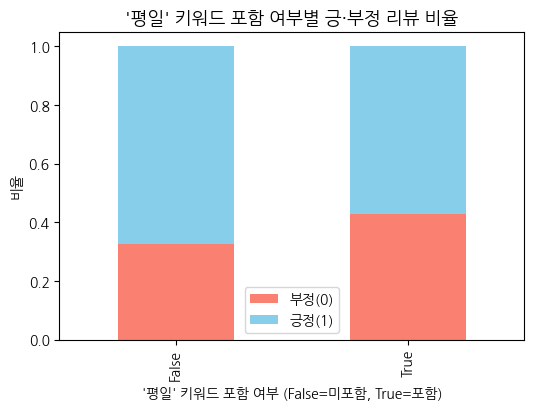


📊 카이제곱 검정 결과
Chi2 통계량: 19.924
p-value: 0.00001
✅ 유의미한 차이 있음 → '평일' 언급 리뷰의 부정 비율이 유의하게 높음 (가설 채택)


In [ ]:
# 📊 '평일' 키워드 포함 리뷰의 부정 비율 검정

import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# ✅ 1. 데이터 불러오기
df = pd.read_csv('/content/naver+google_review_final.csv')

# ✅ 2. '평일' 키워드 포함 여부 컬럼 생성
df['contains_weekday'] = df['내용'].apply(lambda x: '평일' in str(x))

# ✅ 3. 평일 언급 여부별 긍·부정 비율 요약
summary = df.groupby('contains_weekday')['라벨'].value_counts(normalize=True).unstack().fillna(0)
print("🔹 '평일' 키워드 포함 여부별 긍·부정 리뷰 비율\n")
print(summary)

# ✅ 4. 시각화
summary.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(6,4))
plt.title("'평일' 키워드 포함 여부별 긍·부정 리뷰 비율", fontsize=13)
plt.xlabel("'평일' 키워드 포함 여부 (False=미포함, True=포함)")
plt.ylabel('비율')
plt.legend(['부정(0)', '긍정(1)'])
plt.show()

# ✅ 5. 카이제곱 검정
contingency = pd.crosstab(df['contains_weekday'], df['라벨'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("\n📊 카이제곱 검정 결과")
print(f"Chi2 통계량: {chi2:.3f}")
print(f"p-value: {p:.5f}")

if p < 0.05:
    print("✅ 유의미한 차이 있음 → '평일' 언급 리뷰의 부정 비율이 유의하게 높음 (가설 채택)")
else:
    print("❌ 유의미한 차이 없음 → '평일' 언급 여부에 따른 부정 비율 차이 미미 (가설 기각)")


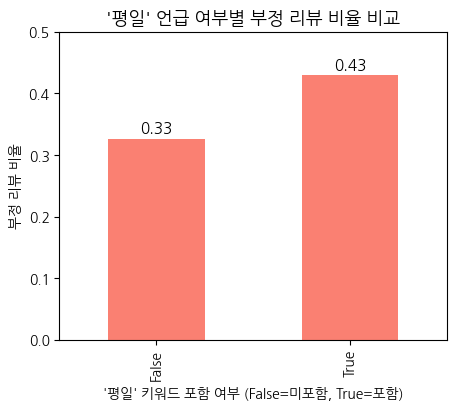

In [ ]:
plt.figure(figsize=(5,4))
neg_ratio = summary[0]  # 부정 라벨(0) 비율만
neg_ratio.plot(kind='bar', color='salmon')
plt.title("'평일' 언급 여부별 부정 리뷰 비율 비교", fontsize=13)
plt.ylabel('부정 리뷰 비율')
plt.xlabel("'평일' 키워드 포함 여부 (False=미포함, True=포함)")
for i, v in enumerate(neg_ratio):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=11)
plt.ylim(0, 0.5)
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('/content/naver+google_review_final.csv')

# 평일 언급 여부
df['contains_weekday'] = df['내용'].apply(lambda x: '평일' in str(x))

# 운영 관련 키워드
ops_keywords = ['운영', '직원', '서비스', '응대', '대기', '줄', '관리', '혼잡', '인력']

# 운영 관련 키워드 포함 여부
df['contains_ops'] = df['내용'].apply(lambda x: any(k in str(x) for k in ops_keywords))

# 평일 언급 리뷰 중 운영 관련 키워드가 포함된 비율
summary = df.groupby('contains_weekday')['contains_ops'].mean()
print(summary)


contains_weekday
False    0.208327
True     0.422658
Name: contains_ops, dtype: float64
